# Python Assessment

### (a)
Generate a 101 by 101 zeros array, then add:<br>
* a flat “background”: where each pixel value is drawn from a Normal distribution with a peak value of 5 and a sigma of 3.<br>
* a 2-D Gaussian profile with a max value of 100 and centered on location (50,50) and with a sigma of 10 pixels. Each pixel should have a value added to it that is Normal distribution about the value expected from the Gaussian model (and a sigma given by the square root of that value).<br>
* another 2-D Gaussian profile  and with a max value of 20 centered on location (50,50)  and with a sigma of 3 pixels.  Each pixel should have a value added to it that is Normal distribution about the value expected from the [2nd] Gaussian model (and a sigma given by the square root of that value). <br>

Your image should look like this (colour scale not important)<br>
![image.png](attachment:image.png)



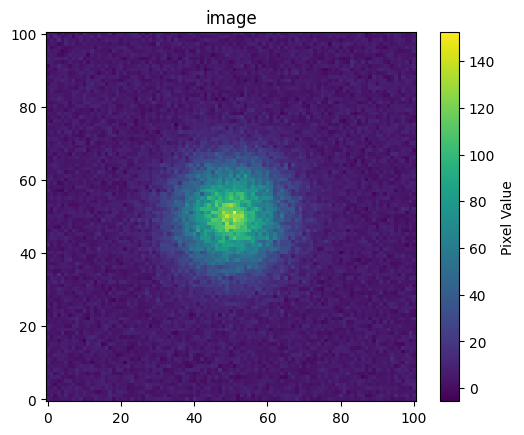

In [4]:
import numpy as np
import matplotlib.pyplot as plt

shape = (101, 101)
image = np.zeros(shape)

y, x = np.indices(shape)

background = np.random.normal(loc=5, scale = 3, size = shape)
image += background

#first gaussian
amp1 = 100
x0, y0 = 50, 50
sigma1 = 10

gaussian1 = amp1 * np.exp(-((x - x0)**2 + (y - y0)**2)/(2 * sigma1**2))
noise1 = np.random.normal(loc=0, scale=np.sqrt(gaussian1))
image += gaussian1 + noise1

#second gaussian
amp2 = 20
sigma2 = 3

gaussian2 = amp2 * np.exp(-((x - x0)**2 + (y - y0)**2)/(2 * sigma2**2))
noise2 = np.random.normal(loc=0, scale=np.sqrt(gaussian2))
image += gaussian2 + noise2

#plot
plt.imshow(image, origin='lower', cmap='viridis')
plt.colorbar(label='Pixel Value')
plt.title("image")
plt.show()

### (b)

Generate a 1-D profile from your array. This can be either a single row of pixel values or a sum of rows.

(101,)


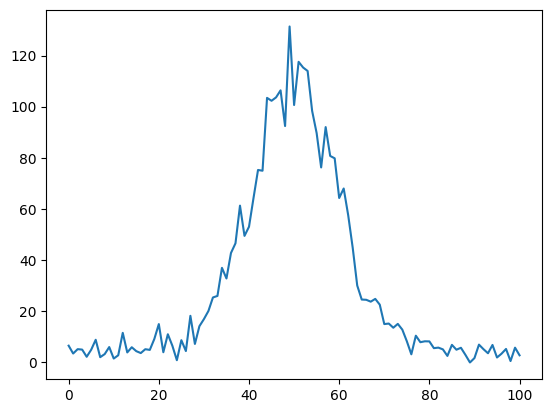

In [21]:
row_profile = image[48]

plt.plot(row_profile)
plt.show

print(row_profile.shape)

### (c)

Fit a double Gaussian to your 1-D profile, and plot the best model on top of the 1-D profile. This is hard.<br> Skip this bit if needs be and come back to it.

In [27]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

row_profile = image[50]
x_values = np.arange(len(row_profile))

def double_gaussian(x, A1, mu1, sigma1, A2, mu2, sigma2):
    g1 = A1 * np.exp(-((x - mu1)**2 /(2 * sigma1**2))),
    g2 = A2 * np.exp(-((x - mu2)**2 /(2 * sigma2**2)))
    return g1 + g2



row_profile = image[50]
x_values = np.arange(len(row_profile))

#guess at parameters
p0 = [100, 50, 10, 20, 50, 3]

#best fit curve
popt, pcov = curve_fit(double_gaussian, x_values, row_profile, p0=p0)
fit = double_gaussian(x_values, *popt)

plt.plot(fit)
plt.show()

TypeError: Improper input: func input vector length N=6 must not exceed func output vector length M=1

### (d)

Repeat exercise (a), but use Poisson distribution for the background and the 2nd Gaussian (i.e. it is not possible for the value to drop below 0).


### (e)

Consider a 101 by 101 array:
+ Generate a list of several thousand random locations within your such array, e.g. [(3,75),(56,34)]
- Calculate how often one of your random locations falls within 10 pixels of any of the (straight) edges.
* Calculate how often one of your random locations falls in either of these regions: a) outside a circle with radius 40 pixels, b) within 10 pixels of the inside of circle.

To check, probabilities should be approximately : a) 0.5, b) 0.22

### (f)

Ask the user to input a location and let them know if that location is in one of the two regions in (e)- ••• . Allow repeat submissions, and allow the user to tell you when they want to move on.

### (g)

Generate a 101 by 101 array, then:
* add 3 synthetic “sources” by taking random locations and generating 2-D Gaussians around each one. Start with a peak value of 10 and a sigma of 3 (below left).
* Then add a noisy background that has a mean value of 3 and a sigma of 1 (below middle).
* Then set all values (sources and background) to zero outside a circle of radius 40 pixels (below right).
* Repeat 2 times (to make 6 images in total). Display all the images to the screen.


![image-4.png](attachment:image-4.png)


### (h)

Run through each of your six images and alert the user if any of the sources therein falls within 10 pixels of the inside edge of your 40 pixel circle or in the “zero’d” region outside. [You will have to preserve the locations you used to generate the 6x3 sources]

### (i)

Tell the user what percentage of the signal from each source fell into the "zero" region outside the circle. For that last bit, you can use your knowledge of the source location, normalisation and sigma [look up “volume under the gaussian function” in Wikipedia].

### (j)
Switch to circularly symmetric “Beta-models’’  (see equation below) for your shapes and repeat steps (g),(h),(i)

$$ y=S_0(1 + (r/r_0)^2 )^{-1.5} $$
where r is the radius from the centre, $r_0$ is the “core” [use $r_0$=3 for now], $S_0$ is the normalisation [use 10 for now]. Note that the equivalent of step (i) is harder than before because you will need to numerically integrate [rather than using an analytical formula]


### (k)

Produce an image “with vignetting”: i.e. now the sensitivity of the “detector” is decreasing radially from 100% in the centre to 50% at the far corner. The functional form of this decrease is linear. Note that your background is not vignetted (so the expectation value does not change across the detector).

### (l)

repeat (j) when $1<r_0<5$ with a flat (constant) probability distribution and a well-known center. Since we don’t know what our value for $r_0$ is, we will make the assumption that $r_0$=3. Return the error in making this assumption.

### (m)

similar to (l), but now you can know what your r0 value is, but you don’t know where the centre is. You can guess the centre using the brightest pixel in the “active” area, i.e. inside our circle. Return the error on your percentage of lost flux.

### (n)

repeat steps (j) through (m), but this using an elliptical beta model <br>
It may be helpful to know how to rotate cartesians coordinates system by an angle;
$$ x' = (x-x_0)\cos(\theta) - (y-y_0)\sin(\theta) $$
$$ y' = (x-x_0)\sin(\theta) + (y-y_0)\cos(\theta) $$
